In [1]:
import json
import pandas as pd
from pathlib import Path
from typing import List, Dict, Any

# 指定目录和json文件
data_dir = Path('.')
json_files = [
    'rebuttal_set_temp_old.json',
    'refactored_alpha_gfn_set_new_icml_fl0.json',
    'refactored_alpha_gfn_set_new_icml.json'
]

def flatten_dict(d: Dict[str, Any], parent_key: str = '', sep: str = '_') -> Dict[str, Any]:
    """递归展平嵌套字典"""
    items = []
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

# 加载所有json文件并解析为DataFrame
all_data = []

for file in json_files:
    file_path = data_dir / file
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    # 每个json文件的顶层key是实验名称，value是参数字典
    for exp_name, exp_params in data.items():
        flat_params = flatten_dict(exp_params)
        flat_params['experiment_name'] = exp_name  # 保存实验名称
        flat_params['source_file'] = file  # 保存来源文件
        all_data.append(flat_params)

# 转换为DataFrame
df = pd.DataFrame(all_data)

print(f"✓ 加载完成！共 {len(df)} 行")
print(f"✓ 列数: {len(df.columns)}")
print(f"\n数据源: {json_files}")
print(f"\nDataFrame 形状: {df.shape}")
print(f"\n前几行:")
df.head()

✓ 加载完成！共 180 行
✓ 列数: 116

数据源: ['rebuttal_set_temp_old.json', 'refactored_alpha_gfn_set_new_icml_fl0.json', 'refactored_alpha_gfn_set_new_icml.json']

DataFrame 形状: (180, 116)

前几行:


,_runtime,_step,_timestamp,action_dim,alpha,alpha_init,alpha_logit,alpha_lr,alpha_sched,alpha_train_first_steps,...,use_modified_reward,use_replay_buffer,wdb,wdb_group,experiment_name,source_file,ckpt_every,ckpt_save_history,ckpt_save_test_set,resume
0,5519.194801,200,1.763526e+09,80,0.507356,0.9,0.029425,0.001,hold_exp,False,...,False,False,True,set_temp_rebuttal,ss(2)_ms(0)_md(on)_mdfr(0)_upb(1)_sz(medium)_m...,rebuttal_set_temp_old.json,NaN,NaN,NaN,NaN
1,3961.776643,200,1.763525e+09,100,0.507356,0.9,0.029425,0.001,hold_exp,False,...,False,False,True,set_temp_rebuttal,ss(2)_ms(0)_md(on)_mdfr(0)_upb(1)_sz(large)_m(...,rebuttal_set_temp_old.json,NaN,NaN,NaN,NaN
2,3790.735742,200,1.763492e+09,80,0.507356,0.9,0.029425,0.001,hold_exp,False,...,False,False,True,set_temp_rebuttal,ss(1)_ms(0)_md(on)_mdfr(0)_upb(1)_sz(medium)_m...,rebuttal_set_temp_old.json,NaN,NaN,NaN,NaN
3,4946.030001,200,1.763521e+09,80,0.500000,0.5,0.000000,0.001,hold_exp,False,...,False,False,True,set_temp_rebuttal,ss(2)_ms(0)_md(on)_mdfr(0)_upb(1)_sz(medium)_m...,rebuttal_set_temp_old.json,NaN,NaN,NaN,NaN
4,5457.609414,200,1.763526e+09,100,0.507356,0.9,0.029425,0.001,hold_exp,False,...,False,False,True,set_temp_rebuttal,ss(0)_ms(0)_md(on)_mdfr(0)_upb(1)_sz(large)_m(...,rebuttal_set_temp_old.json,NaN,NaN,NaN,NaN


总实验数: 90

Unique seeds: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Unique sizes: ['large']
Unique alphas (from alpha_init): [np.float64(0.1), np.float64(0.2), np.float64(0.3), np.float64(0.4), np.float64(0.5), np.float64(0.6), np.float64(0.7), np.float64(0.8), np.float64(0.9)]
Unique objectives/methods: ['fl-subtb', 'subtb_gfn']

数据来源分布:
source_file                                 method     size 
refactored_alpha_gfn_set_new_icml.json      fl-subtb   large    45
refactored_alpha_gfn_set_new_icml_fl0.json  subtb_gfn  large    45
dtype: int64

找到 2 个不同的 objectives: ['fl-subtb', 'subtb_gfn']

Objective: fl-subtb, Size: large
  实验数: 45
  来源文件: ['refactored_alpha_gfn_set_new_icml.json']

按 seed 平均后的结果 (基于 alpha_init):
   alpha   modes  mean_top_1000_R  mean_top_1000_similarity  spearman_corr_test
0    0.1     6.4    208113.069956                  0.799944            0.931390
1    0.2     4.2    209808.025508                  0.800228            0.923500
2    0.3     

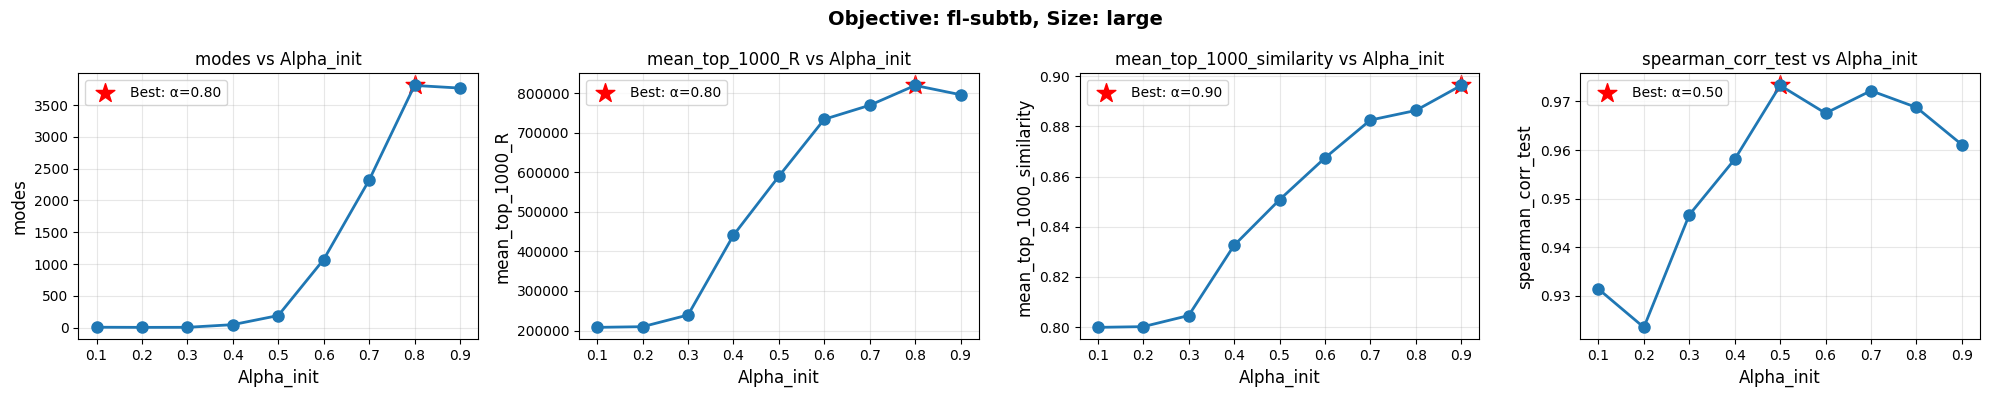

✓ 已保存图表: side_product/alpha_analysis_subtb_gfn_large.png


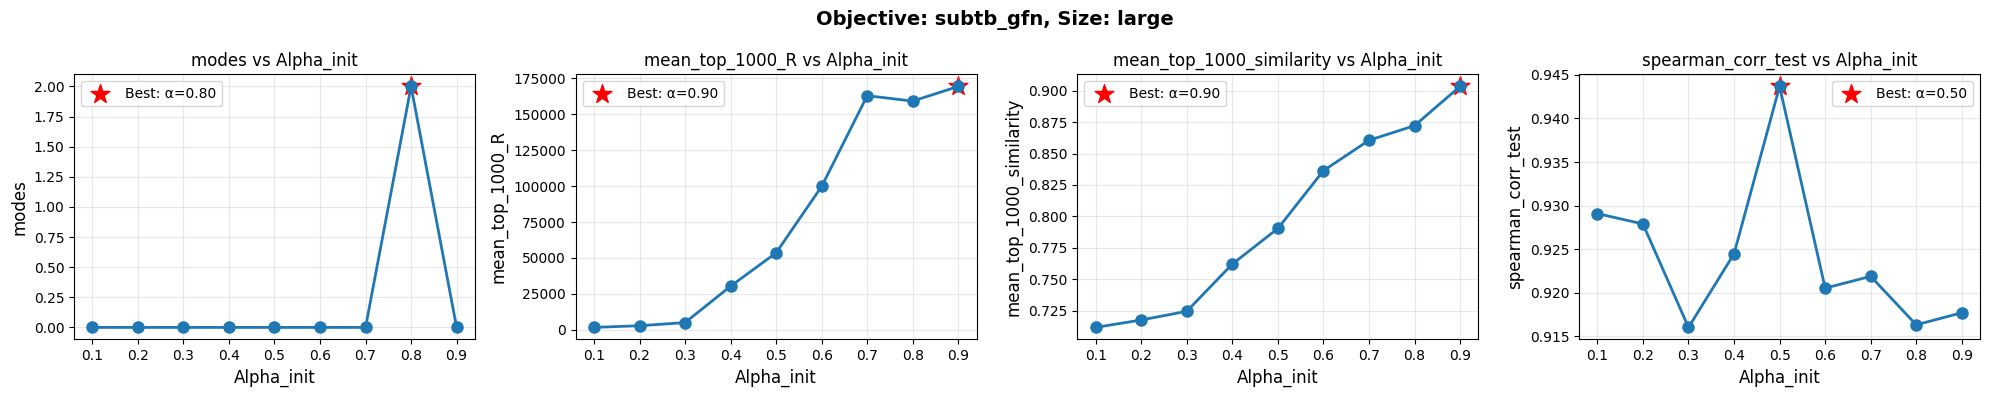


✓ 所有 objectives 和 size 分析完成!


In [22]:
import json
import pandas as pd
import numpy as np
from pathlib import Path
import re
import matplotlib.pyplot as plt

# 加载这两个json文件
files = [
    'refactored_alpha_gfn_set_new_icml_fl0.json',
    'refactored_alpha_gfn_set_new_icml.json'
]

# 使用列表而不是字典来避免覆盖
all_experiments = []

for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
    
    for exp_name, exp_params in data.items():
        all_experiments.append({
            'exp_name': exp_name,
            'source_file': file,
            **exp_params
        })

# 解析实验名称中的参数
def parse_exp_name(exp_name):
    params = {}
    ss_match = re.search(r'ss\((\d+)\)', exp_name)
    if ss_match:
        params['seed'] = int(ss_match.group(1))
    
    # 提取method (m)
    m_match = re.search(r'_m\(([^)]+)\)', exp_name)
    if m_match:
        params['method'] = m_match.group(1)
    
    # 提取size sz(xxx)
    sz_match = re.search(r'_sz\(([^)]+)\)', exp_name)
    if sz_match:
        params['size'] = sz_match.group(1)
    
    # 提取alpha_init a(N)
    a_match = re.search(r'_a\(([^)]+)\)', exp_name)
    if a_match:
        params['alpha_init_from_name'] = float(a_match.group(1))
    
    return params

# 为每个实验解析名称中的参数，并从json中读取alpha_init
experiments_parsed = []
for exp_data in all_experiments:
    exp_name = exp_data['exp_name']
    source_file = exp_data['source_file']
    parsed = parse_exp_name(exp_name)
    
    # 根据来源文件修改method名称
    method = parsed.get('method')
    # 修改条件：只对refactored_alpha_gfn_set_new_icml.json修改名称（不含_fl0）
    if source_file == 'refactored_alpha_gfn_set_new_icml.json':
        if method == 'subtb_gfn':
            method = 'fl-subtb'
    
    row = {
        'exp_name': exp_name,
        'seed': parsed.get('seed'),
        'source_file': source_file,
        'alpha_init_name': parsed.get('alpha_init_from_name'),
        **exp_data,
        'size': parsed.get('size'),
        'method': method,
        'alpha': exp_data.get('alpha_init'),  # 从JSON中读取alpha_init
    }
    experiments_parsed.append(row)

df_all = pd.DataFrame(experiments_parsed)

print(f"总实验数: {len(df_all)}")
print(f"\nUnique seeds: {sorted(df_all['seed'].dropna().unique())}")
print(f"Unique sizes: {sorted(df_all['size'].dropna().unique())}")
print(f"Unique alphas (from alpha_init): {sorted(df_all['alpha'].dropna().unique())}")
print(f"Unique objectives/methods: {sorted(df_all['method'].dropna().unique())}")
print(f"\n数据来源分布:")
print(df_all.groupby(['source_file', 'method', 'size']).size())

# 使用指定的评估指标
metrics = ['modes', 'mean_top_1000_R', 'mean_top_1000_similarity', 'spearman_corr_test']

# 检查哪些指标存在
available_metrics = [m for m in metrics if m in df_all.columns]
missing_metrics = [m for m in metrics if m not in df_all.columns]

if missing_metrics:
    print(f"⚠️  警告: 以下指标在数据中不存在: {missing_metrics}")
    print(f"✓  可用指标: {available_metrics}\n")
    metrics = available_metrics

# 获取所有唯一的objective/method
objectives = sorted(df_all['method'].dropna().unique())

print("\n" + "=" * 80)
print(f"找到 {len(objectives)} 个不同的 objectives: {objectives}")
print("=" * 80)

# 按method和size分组分析
fig_configs = []

# 对每个objective和size分别分析
for obj in objectives:
    for size in sorted(df_all['size'].dropna().unique()):
        print(f"\n{'=' * 80}")
        print(f"Objective: {obj}, Size: {size}")
        print("=" * 80)
        
        # 筛选当前objective和size的数据
        df_obj = df_all[(df_all['method'] == obj) & (df_all['size'] == size)].copy()
        
        if len(df_obj) == 0:
            print(f"  无数据")
            continue
        
        print(f"  实验数: {len(df_obj)}")
        print(f"  来源文件: {df_obj['source_file'].unique()}")
        
        # 按alpha分组后对seed做平均
        df_averaged = df_obj.groupby('alpha')[metrics].mean().reset_index()
        df_averaged = df_averaged.sort_values('alpha')
        
        print(f"\n按 seed 平均后的结果 (基于 alpha_init):")
        print(df_averaged.to_string())
        
        # 找最优alpha（基于不同指标）
        print(f"\n最优 Alpha 分析:")
        print("-" * 80)
        
        for metric in metrics:
            if len(df_averaged) > 0 and not df_averaged[metric].isna().all():
                best_idx = df_averaged[metric].idxmax()
                best_alpha = df_averaged.loc[best_idx, 'alpha']
                best_value = df_averaged.loc[best_idx, metric]
                print(f"  {metric:30s} -> 最优 alpha_init: {best_alpha:.4f}, 最优值: {best_value:.6f}")
        
        # 保存配置以便后续绘图
        plot_metrics = [m for m in metrics if not df_averaged[m].isna().all()]
        if len(plot_metrics) > 0:
            fig_configs.append({
                'method': obj,
                'size': size,
                'data': df_averaged,
                'metrics': plot_metrics
            })

# 绘制所有图表
print("\n" + "=" * 80)
print("生成图表")
print("=" * 80)

for config in fig_configs:
    method = config['method']
    size = config['size']
    df_averaged = config['data']
    plot_metrics = config['metrics']
    
    n_metrics = len(plot_metrics)
    fig, axes = plt.subplots(1, n_metrics, figsize=(5*n_metrics, 4))
    if n_metrics == 1:
        axes = [axes]
    
    for idx, metric in enumerate(plot_metrics):
        axes[idx].plot(df_averaged['alpha'], df_averaged[metric], 'o-', linewidth=2, markersize=8)
        best_idx = df_averaged[metric].idxmax()
        best_alpha = df_averaged.loc[best_idx, 'alpha']
        best_value = df_averaged.loc[best_idx, metric]
        axes[idx].scatter([best_alpha], [best_value], color='red', s=200, marker='*', 
                         label=f'Best: α={best_alpha:.2f}')
        axes[idx].set_xlabel('Alpha_init', fontsize=12)
        axes[idx].set_ylabel(metric, fontsize=12)
        axes[idx].set_title(f'{metric} vs Alpha_init', fontsize=12)
        axes[idx].grid(True, alpha=0.3)
        axes[idx].legend()
    
    plt.suptitle(f'Objective: {method}, Size: {size}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    
    # 保存图表
    output_path = f'side_product/alpha_analysis_{method}_{size}.png'
    Path('side_product').mkdir(parents=True, exist_ok=True)
    plt.savefig(output_path, dpi=150, bbox_inches='tight')
    print(f"✓ 已保存图表: {output_path}")
    plt.show()

print("\n" + "=" * 80)
print("✓ 所有 objectives 和 size 分析完成!")
print("=" * 80)

In [18]:
# 调试：重新执行一遍转换逻辑看看
import json
import re

# 测试一个来自refactored_alpha_gfn_set_new_icml.json的实验
test_exp_data = experiments_parsed[45]  # 第46个应该来自第二个文件
print(f"测试实验 #{45}:")
print(f"  source_file: {test_exp_data['source_file']}")
print(f"  exp_name: {test_exp_data['exp_name']}")
print(f"  method: {test_exp_data['method']}")

# 手动测试条件
source_file = test_exp_data['source_file']
print(f"\n条件测试:")
print(f"  source_file == 'refactored_alpha_gfn_set_new_icml.json': {source_file == 'refactored_alpha_gfn_set_new_icml.json'}")
print(f"  source_file: '{source_file}'")

测试实验 #45:
  source_file: refactored_alpha_gfn_set_new_icml.json
  exp_name: ss(2)_ms(0)_md(on)_mdfr(0)_upb(1)_sz(large)_m(subtb_gfn)_a(0.8)
  method: subtb_gfn

条件测试:
  source_file == 'refactored_alpha_gfn_set_new_icml.json': True
  source_file: 'refactored_alpha_gfn_set_new_icml.json'


✓ 加载完成！共 90 个实验

数据统计:
  总实验数: 90
  Unique seeds: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
  Unique methods: ['db_gfn', 'tb_gfn']
  Unique sizes: ['large', 'medium', 'small']
  Unique alpha_init: [np.float64(0.5), np.float64(0.7), np.float64(0.8), np.float64(0.9)]
✓ 可用指标: ['modes', 'mean_top_1000_R', 'mean_top_1000_similarity', 'spearman_corr_test']

按 Method 和 Size 分组分析

--------------------------------------------------------------------------------
Method: db_gfn, Size: large
  实验数: 20
  Seeds: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
  Alpha_init: [np.float64(0.5), np.float64(0.9)]

按 seed 平均后的结果 (基于 alpha_init):
   alpha_init_name   modes  mean_top_1000_R  mean_top_1000_similarity  spearman_corr_test
0              0.5   123.8    325588.388010                  0.807941            0.943265
1              0.9  1297.5    696633.186463                  0.878852            0.895848

最优 Alpha 分析:
  modes                          -> 最优 al

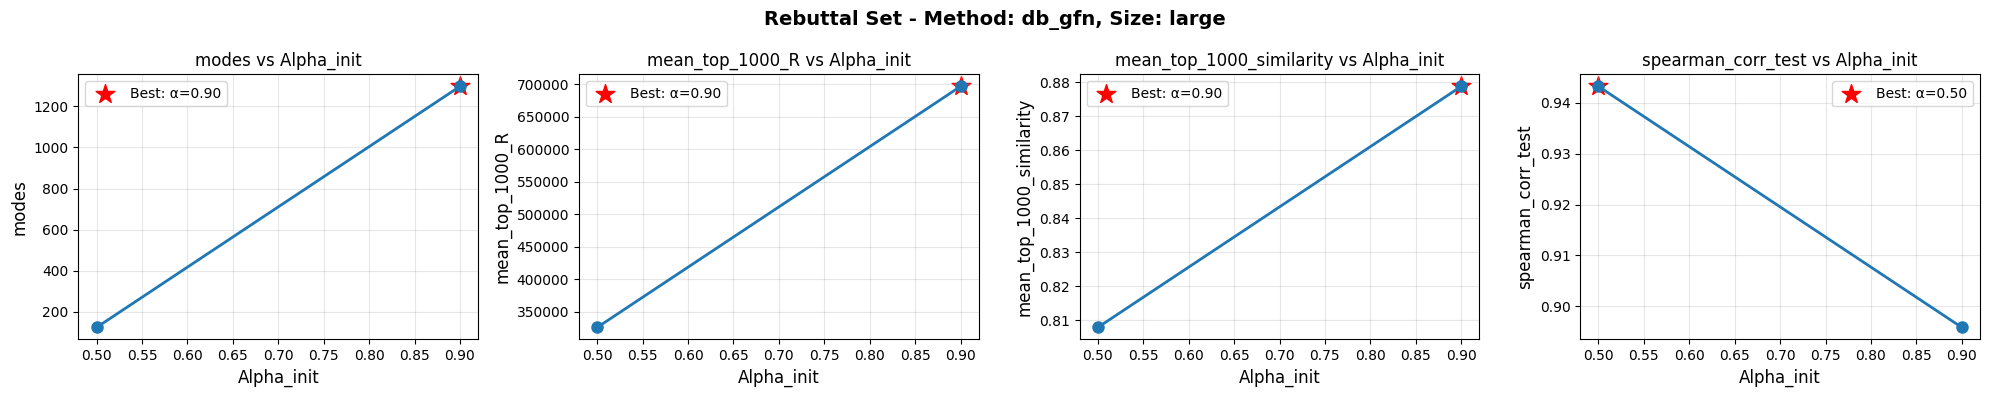

✓ 已保存图表: side_product/rebuttal_analysis_db_gfn_medium.png


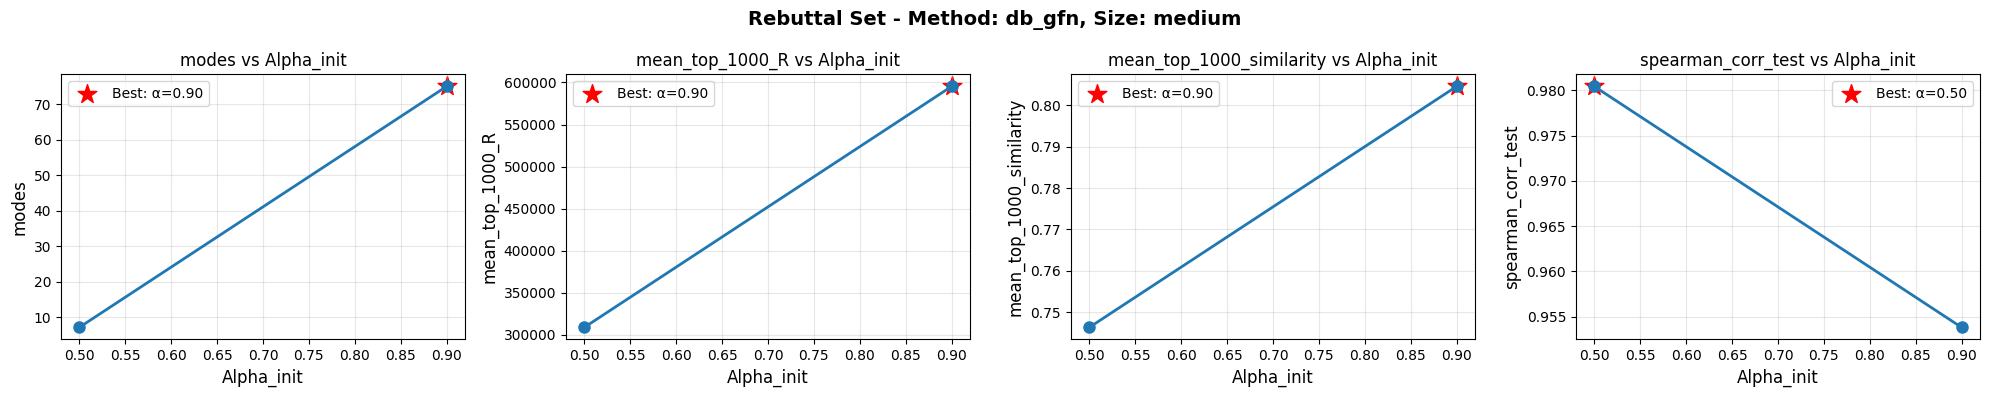

✓ 已保存图表: side_product/rebuttal_analysis_db_gfn_small.png


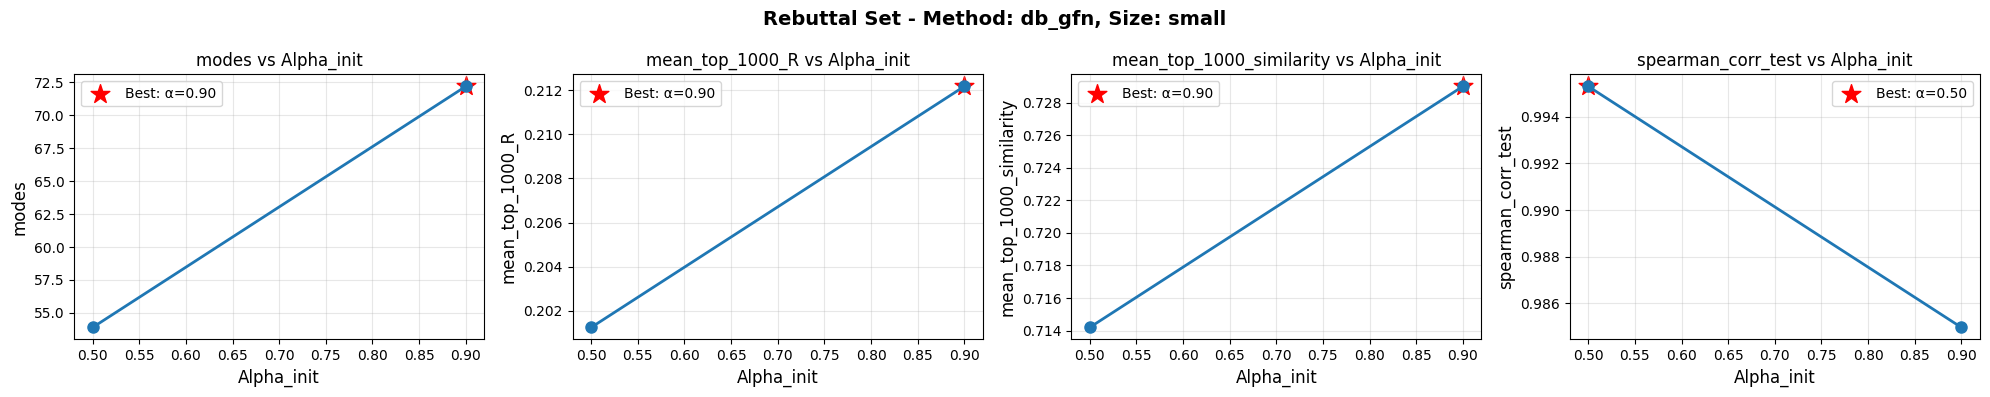

✓ 已保存图表: side_product/rebuttal_analysis_tb_gfn_large.png


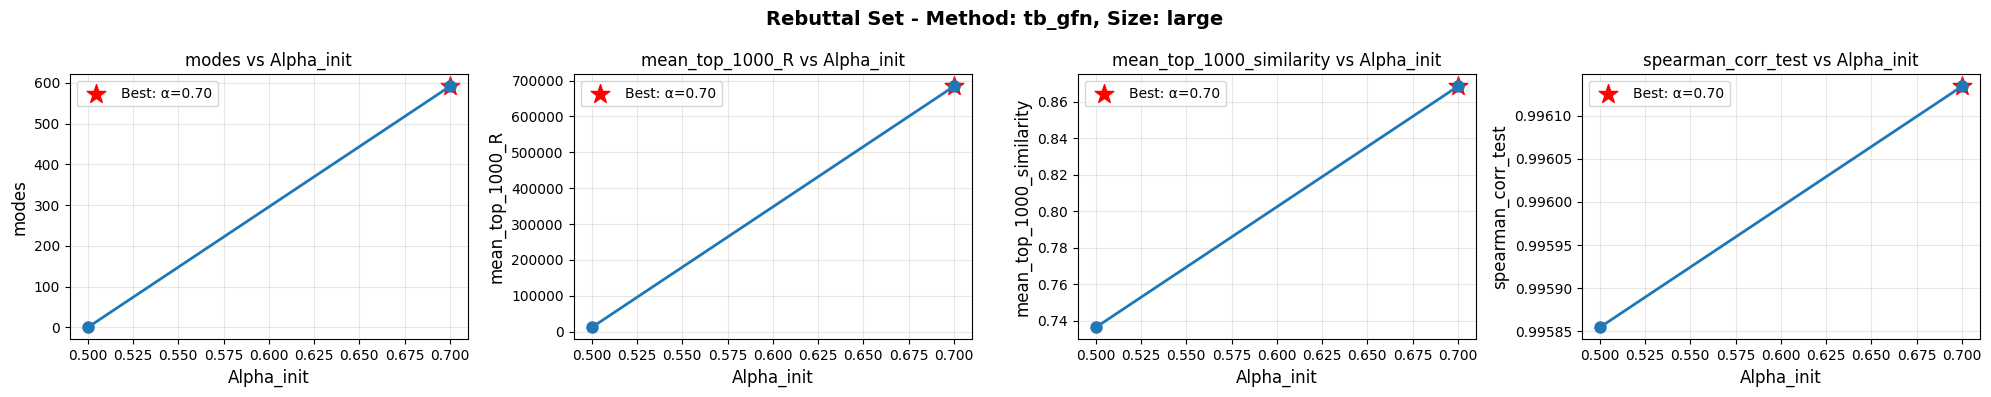

✓ 已保存图表: side_product/rebuttal_analysis_tb_gfn_medium.png


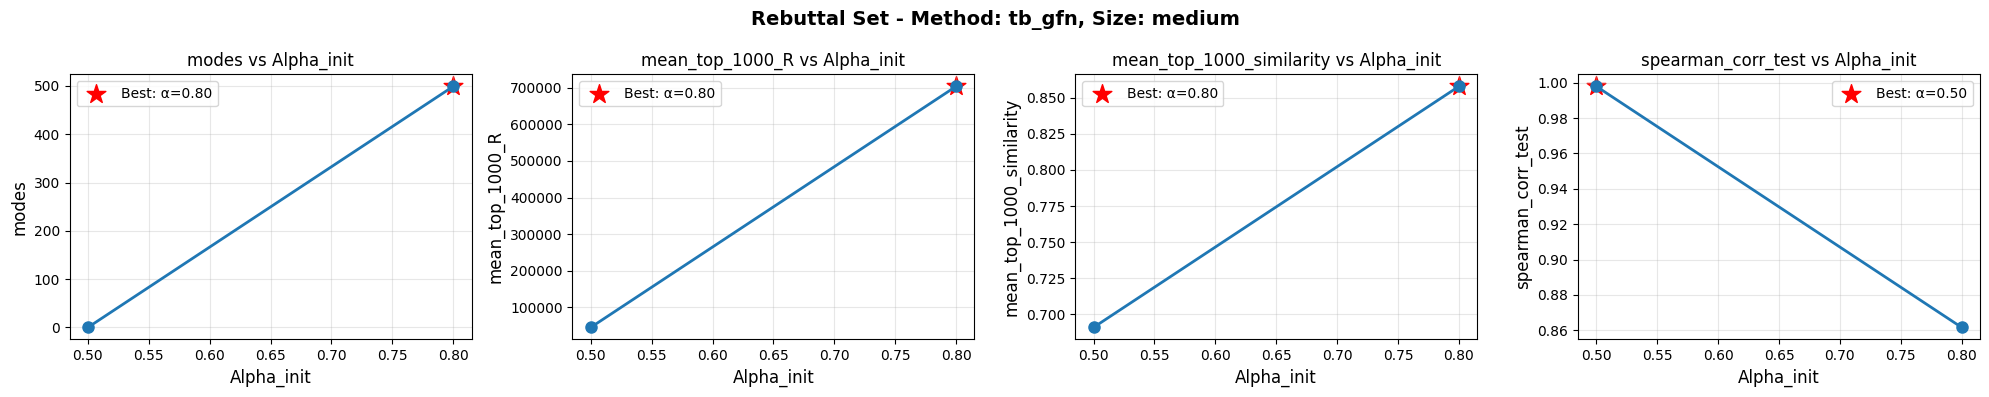

✓ 已保存图表: side_product/rebuttal_analysis_tb_gfn_small.png


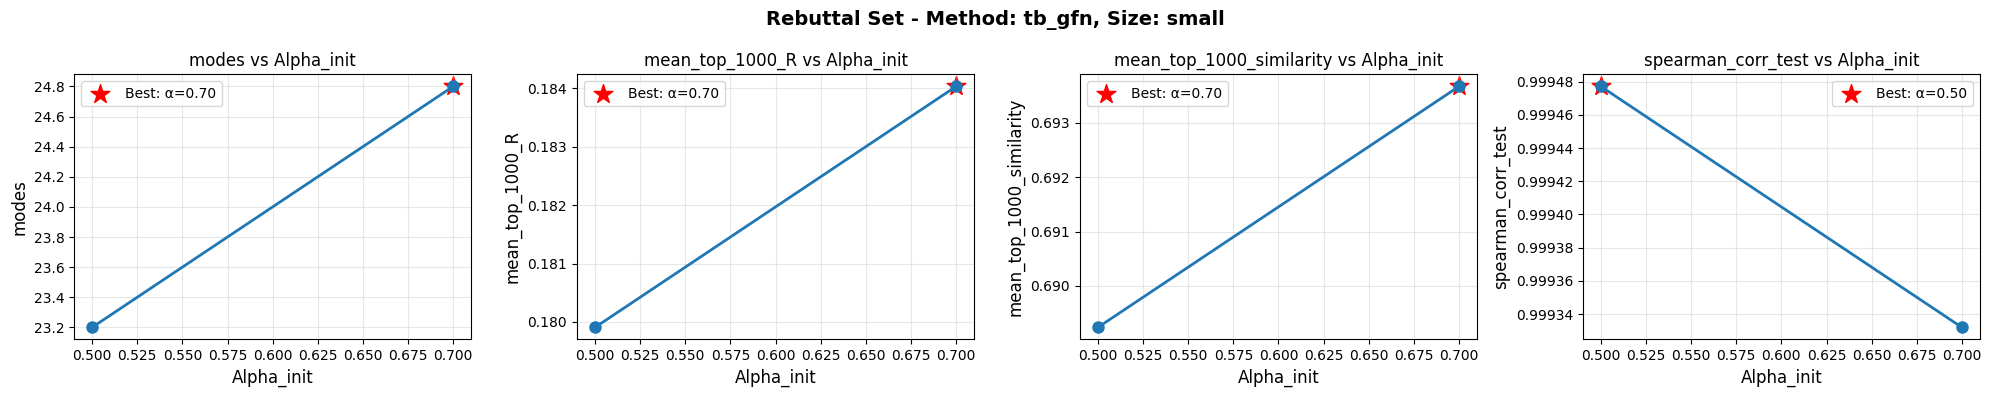


✓ 分析完成！所有图表已保存到 side_product/ 目录


In [20]:

# 处理 rebuttal_set_temp_old.json - 参考test.ipynb的方法
import json
import pandas as pd
import numpy as np
from pathlib import Path
import re
import matplotlib.pyplot as plt

# 加载 rebuttal_set_temp_old.json
file_path = 'rebuttal_set_temp_old.json'

with open(file_path, 'r') as f:
    data = json.load(f)

# 使用列表来收集所有实验
all_experiments = []

for exp_name, exp_params in data.items():
    all_experiments.append({
        'exp_name': exp_name,
        'source_file': file_path,
        **exp_params
    })

print(f"✓ 加载完成！共 {len(all_experiments)} 个实验")

# 解析实验名称中的参数
def parse_exp_name(exp_name):
    params = {}
    # 提取seed ss(N)
    ss_match = re.search(r'ss\((\d+)\)', exp_name)
    if ss_match:
        params['seed'] = int(ss_match.group(1))
    
    # 提取method m(xxx)
    m_match = re.search(r'_m\(([^)]+)\)', exp_name)
    if m_match:
        params['method'] = m_match.group(1)
    
    # 提取size sz(xxx)
    sz_match = re.search(r'_sz\(([^)]+)\)', exp_name)
    if sz_match:
        params['size'] = sz_match.group(1)
    
    # 提取alpha_init a(N)
    a_match = re.search(r'_a\(([^)]+)\)', exp_name)
    if a_match:
        params['alpha_init_from_name'] = float(a_match.group(1))
    
    return params

# 为每个实验解析名称中的参数
experiments_parsed = []
for exp_data in all_experiments:
    exp_name = exp_data['exp_name']
    parsed = parse_exp_name(exp_name)
    
    row = {
        'exp_name': exp_name,
        'seed': parsed.get('seed'),
        'method': parsed.get('method'),
        'size': parsed.get('size'),
        'alpha_init_name': parsed.get('alpha_init_from_name'),
        **exp_data,
    }
    experiments_parsed.append(row)

df_all = pd.DataFrame(experiments_parsed)

print(f"\n数据统计:")
print(f"  总实验数: {len(df_all)}")
print(f"  Unique seeds: {sorted(df_all['seed'].dropna().unique())}")
print(f"  Unique methods: {sorted(df_all['method'].dropna().unique())}")
print(f"  Unique sizes: {sorted(df_all['size'].dropna().unique())}")
print(f"  Unique alpha_init: {sorted(df_all['alpha_init_name'].dropna().unique())}")

# 定义评估指标
metrics = ['modes', 'mean_top_1000_R', 'mean_top_1000_similarity', 'spearman_corr_test']

# 检查哪些指标存在
available_metrics = [m for m in metrics if m in df_all.columns]
missing_metrics = [m for m in metrics if m not in df_all.columns]

if missing_metrics:
    print(f"\n⚠️  以下指标不存在: {missing_metrics}")

print(f"✓ 可用指标: {available_metrics}\n")
metrics = available_metrics

# 按method和size分组分析
print("=" * 80)
print("按 Method 和 Size 分组分析")
print("=" * 80)

fig_configs = []

# 按method和size分组
for method in sorted(df_all['method'].dropna().unique()):
    for size in sorted(df_all['size'].dropna().unique()):
        df_filtered = df_all[(df_all['method'] == method) & (df_all['size'] == size)].copy()
        
        if len(df_filtered) == 0:
            continue
        
        print(f"\n{'-' * 80}")
        print(f"Method: {method}, Size: {size}")
        print(f"  实验数: {len(df_filtered)}")
        print(f"  Seeds: {sorted(df_filtered['seed'].dropna().unique())}")
        print(f"  Alpha_init: {sorted(df_filtered['alpha_init_name'].dropna().unique())}")
        
        # 按alpha_init分组后对seed做平均
        df_averaged = df_filtered.groupby('alpha_init_name')[metrics].mean().reset_index()
        df_averaged = df_averaged.sort_values('alpha_init_name')
        
        print(f"\n按 seed 平均后的结果 (基于 alpha_init):")
        print(df_averaged.to_string())
        
        # 找最优alpha（基于不同指标）
        print(f"\n最优 Alpha 分析:")
        for metric in metrics:
            if len(df_averaged) > 0 and not df_averaged[metric].isna().all():
                best_idx = df_averaged[metric].idxmax()
                best_alpha = df_averaged.loc[best_idx, 'alpha_init_name']
                best_value = df_averaged.loc[best_idx, metric]
                print(f"  {metric:30s} -> 最优 alpha: {best_alpha:.2f}, 最优值: {best_value:.6f}")
        
        # 保存配置以便后续绘图
        fig_configs.append({
            'method': method,
            'size': size,
            'data': df_averaged,
            'metrics': [m for m in metrics if not df_averaged[m].isna().all()]
        })

# 绘制所有图表
print("\n" + "=" * 80)
print("生成图表")
print("=" * 80)

for config in fig_configs:
    method = config['method']
    size = config['size']
    df_averaged = config['data']
    plot_metrics = config['metrics']
    
    if len(plot_metrics) == 0:
        continue
    
    n_metrics = len(plot_metrics)
    fig, axes = plt.subplots(1, n_metrics, figsize=(5*n_metrics, 4))
    if n_metrics == 1:
        axes = [axes]
    
    for idx, metric in enumerate(plot_metrics):
        ax = axes[idx]
        ax.plot(df_averaged['alpha_init_name'], df_averaged[metric], 'o-', linewidth=2, markersize=8)
        
        best_idx = df_averaged[metric].idxmax()
        best_alpha = df_averaged.loc[best_idx, 'alpha_init_name']
        best_value = df_averaged.loc[best_idx, metric]
        ax.scatter([best_alpha], [best_value], color='red', s=200, marker='*', 
                   label=f'Best: α={best_alpha:.2f}')
        
        ax.set_xlabel('Alpha_init', fontsize=12)
        ax.set_ylabel(metric, fontsize=12)
        ax.set_title(f'{metric} vs Alpha_init', fontsize=12)
        ax.grid(True, alpha=0.3)
        ax.legend()
    
    plt.suptitle(f'Rebuttal Set - Method: {method}, Size: {size}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    
    # 保存图表
    output_path = f'side_product/rebuttal_analysis_{method}_{size}.png'
    Path('side_product').mkdir(parents=True, exist_ok=True)
    plt.savefig(output_path, dpi=150, bbox_inches='tight')
    print(f"✓ 已保存图表: {output_path}")
    plt.show()

print("\n" + "=" * 80)
print("✓ 分析完成！所有图表已保存到 side_product/ 目录")
print("=" * 80)
